In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

path = '..'

In [111]:
df = pd.read_csv(f'{path}/dataset/GetSBFinanceInfoService/getFnafInfo/all.csv')

In [112]:
df['지역'] = df['bizAreaNm'].apply(lambda x: x.split(' ') if len(x.split(' '))>2 else list(x.split(' '))+[''] if len(x.split(' '))==2 else list(x.split(' '))+['',''])

In [113]:
df['지역구분'] = df['지역'].apply(lambda x: len(x))

In [105]:
df['지역구분'].value_counts()

지역구분
3    317642
Name: count, dtype: int64

In [114]:
df['지역'] = df['지역'].apply(
    lambda x: (x + ['']) if x[0].endswith('도') else ([''] + x)
)

In [115]:
df['지역_도'] = df['지역'].apply(lambda x: x[0])
df['지역_시'] = df['지역'].apply(lambda x: x[1])
df['지역_구'] = df['지역'].apply(lambda x: x[2])
df['지역_세부'] = df['지역'].apply(lambda x: x[3])

In [116]:
df

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,fnafBasYr,cptlAmt,...,bzopPftAmt,crtmNpfAmt,astTsumAmt,debtTsumAmt,지역,지역구분,지역_도,지역_시,지역_구,지역_세부
0,202208,남성,60대,2009,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,2021,181000000,...,97000000,74000000,841000000,524000000,"[강원도, 강릉시, , ]",3,강원도,강릉시,,
1,202208,남성,50대,1996,강원도 강릉시,42,전문직별 공사업,1명 이상 5명 미만,2020,181000000,...,17000000,6000000,504000000,60000000,"[강원도, 강릉시, , ]",3,강원도,강릉시,,
2,202208,남성,60대,2000,강원도 강릉시,47,소매업; 자동차 제외,5명 이상 10명 미만,2020,181000000,...,99000000,86000000,508000000,278000000,"[강원도, 강릉시, , ]",3,강원도,강릉시,,
3,202208,남성,60대,2004,강원도 강릉시,46,도매 및 상품 중개업,1명 이상 5명 미만,2021,69000000,...,82000000,69000000,417000000,348000000,"[강원도, 강릉시, , ]",3,강원도,강릉시,,
4,202208,남성,40대,2005,강원도 강릉시,46,도매 및 상품 중개업,0명,2020,9000000,...,-24000000,-24000000,116000000,107000000,"[강원도, 강릉시, , ]",3,강원도,강릉시,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317637,202406,남성,40대,2012,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,92000000,...,62000000,54000000,210000000,118000000,"[충청북도, 충주시, 앙성면, ]",3,충청북도,충주시,앙성면,
317638,202406,남성,50대,2018,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,93300000,...,78400000,74600000,225800000,132500000,"[충청북도, 충주시, 앙성면, ]",3,충청북도,충주시,앙성면,
317639,202406,남성,40대,2015,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,177000000,...,0,0,184000000,7000000,"[충청북도, 충주시, 앙성면, ]",3,충청북도,충주시,앙성면,
317640,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,2015,179000000,...,78000000,68000000,416000000,1000000,"[충청북도, 충주시, 앙성면, ]",3,충청북도,충주시,앙성면,


In [117]:
df['부채비율'] = df['debtTsumAmt']/df['cptlAmt'] # 부채/자본
df['자본비율'] = df['cptlAmt']/df['astTsumAmt'] # 자본/자산
df['자산회전율'] = df['saleAmt']/df['astTsumAmt'] # 매출/자산
df['영업이익률'] = df['bzopPftAmt']/df['saleAmt'] # 영업이익/매출
df['순이익률'] = df['crtmNpfAmt']/df['saleAmt'] # 당기순이익/매출

# 추적불가능.. 평균으로 봐야할 듯

In [ ]:
# 업종당 나이 -> 이 데이터 사용할 이유가 없음
# 재무년도 = 기준년도 - 2
# 채무 업종 관계
# 업종별 자산규모

# cptlAmt 자본 saleAmt 매출 bzopPftAmt 영업이익 crtmNpfAmt 당기순이익 astTsumAmt 자산 debtTsumAmt 부채


# 재무 건전성: 자본 비율, 부채 비율, 자산의 변동을 통해 기업의 재정 안정성을 평가할 수 있습니다. 자본 비율이 높고, 부채 비율이 낮으면 재정적으로 안정적인 기업으로 평가됩니다.
# 수익성: 영업이익률과 순이익률을 통해 기업의 수익성을 평가할 수 있습니다. 영업이익률과 순이익률이 높다면, 본업과 전체적으로 잘 운영되고 있다고 판단할 수 있습니다.
# 효율성: 자산 회전율을 통해 자산을 얼마나 효율적으로 운용하고 있는지 분석할 수 있습니다. 자산 회전율이 높다면 자산을 효과적으로 활용하여 매출을 창출하고 있다는 의미입니다.

In [118]:
df

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,fnafBasYr,cptlAmt,...,지역구분,지역_도,지역_시,지역_구,지역_세부,부채비율,자본비율,자산회전율,영업이익률,순이익률
0,202208,남성,60대,2009,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,2021,181000000,...,3,강원도,강릉시,,,2.895028,0.215220,1.303210,0.088504,0.067518
1,202208,남성,50대,1996,강원도 강릉시,42,전문직별 공사업,1명 이상 5명 미만,2020,181000000,...,3,강원도,강릉시,,,0.331492,0.359127,0.998016,0.033797,0.011928
2,202208,남성,60대,2000,강원도 강릉시,47,소매업; 자동차 제외,5명 이상 10명 미만,2020,181000000,...,3,강원도,강릉시,,,1.535912,0.356299,2.157480,0.090328,0.078467
3,202208,남성,60대,2004,강원도 강릉시,46,도매 및 상품 중개업,1명 이상 5명 미만,2021,69000000,...,3,강원도,강릉시,,,5.043478,0.165468,2.628297,0.074818,0.062956
4,202208,남성,40대,2005,강원도 강릉시,46,도매 및 상품 중개업,0명,2020,9000000,...,3,강원도,강릉시,,,11.888889,0.077586,1.543103,-0.134078,-0.134078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317637,202406,남성,40대,2012,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,92000000,...,3,충청북도,충주시,앙성면,,1.282609,0.438095,6.485238,0.045525,0.039650
317638,202406,남성,50대,2018,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,93300000,...,3,충청북도,충주시,앙성면,,1.420150,0.413198,6.031444,0.057567,0.054776
317639,202406,남성,40대,2015,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,177000000,...,3,충청북도,충주시,앙성면,,0.039548,0.961957,7.385870,0.000000,0.000000
317640,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,2015,179000000,...,3,충청북도,충주시,앙성면,,0.005587,0.430288,2.615385,0.071691,0.062500


In [120]:
df['지역_시'].unique()


array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양양군', '영월군', '원주시', '인제군',
       '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '횡성군', '양구군', '가평군',
       '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시',
       '부천시', '부천시구', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '마산시', '밀양시',
       '사천시', '산청군', '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군',
       '함안군', '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시',
       '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군', '영주시', '영천시', '예천군',
       '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '강진군',
       '고흥군', '광양시', '구례군', '나주시', '담양군', '목포시', '무안군', '순천시', '신안군',
       '여수시', '영광군', '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군',
       '화순군', '고창군', '군산시', '김제시', '남원시', '무주군', '부안군', '순창군', '완주군',
       '익산시', '임실군'

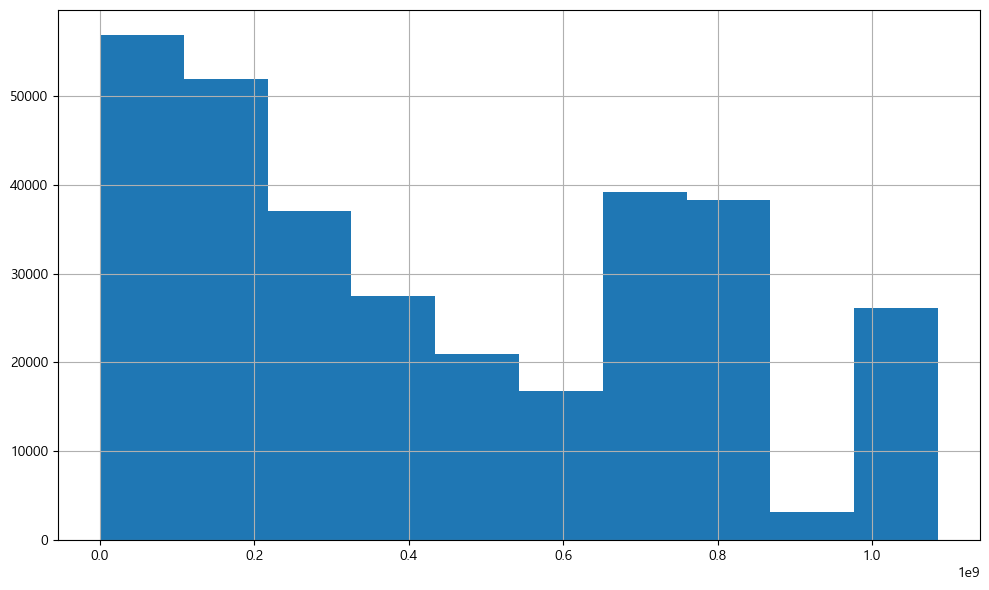

In [126]:
df['astTsumAmt'].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [127]:
df['astTsumAmt'].value_counts()
# 업종, 지역, 사업주

# 10856.0    23545
# 8410.0     31246
# 7250.0     27151
# 0.0         7453

astTsumAmt
841000000     31246
725000000     27151
1085600000    23545
0              7453
92000000        582
              ...  
786500000         1
282600000         1
503700000         1
217200000         1
1062700000        1
Name: count, Length: 9119, dtype: int64

In [123]:
df['자산규모'] = np.select(
    [
        (df['astTsumAmt'] > 841000000),  # 고자산 조건
        (df['astTsumAmt'] < 725000000),  # 저자산 조건
    ],
    ['고자산', '저자산'],
    default='중자산')

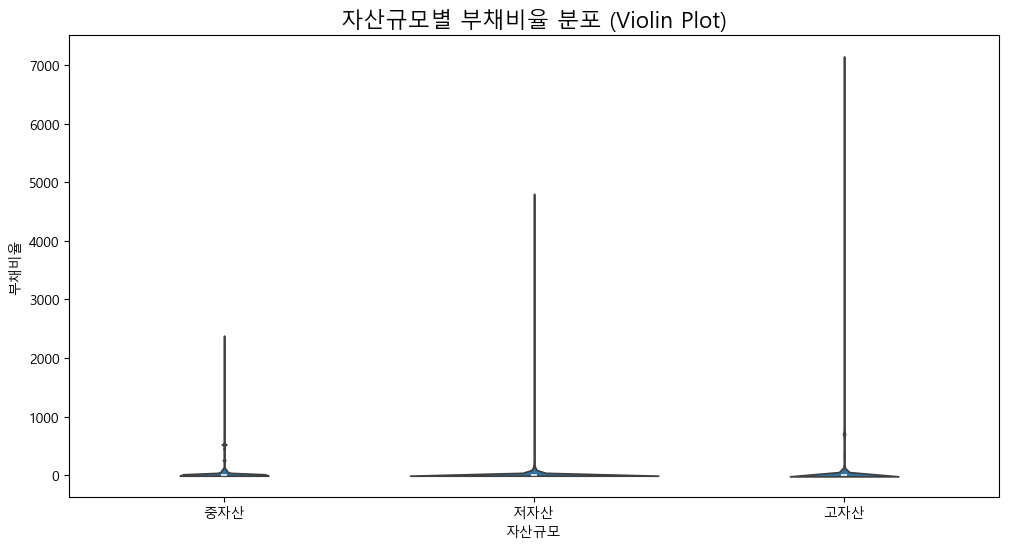

In [124]:
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
sns.violinplot(data=df, x='자산규모', y='부채비율')
plt.title('자산규모별 부채비율 분포 (Violin Plot)', fontsize=16)
plt.show()

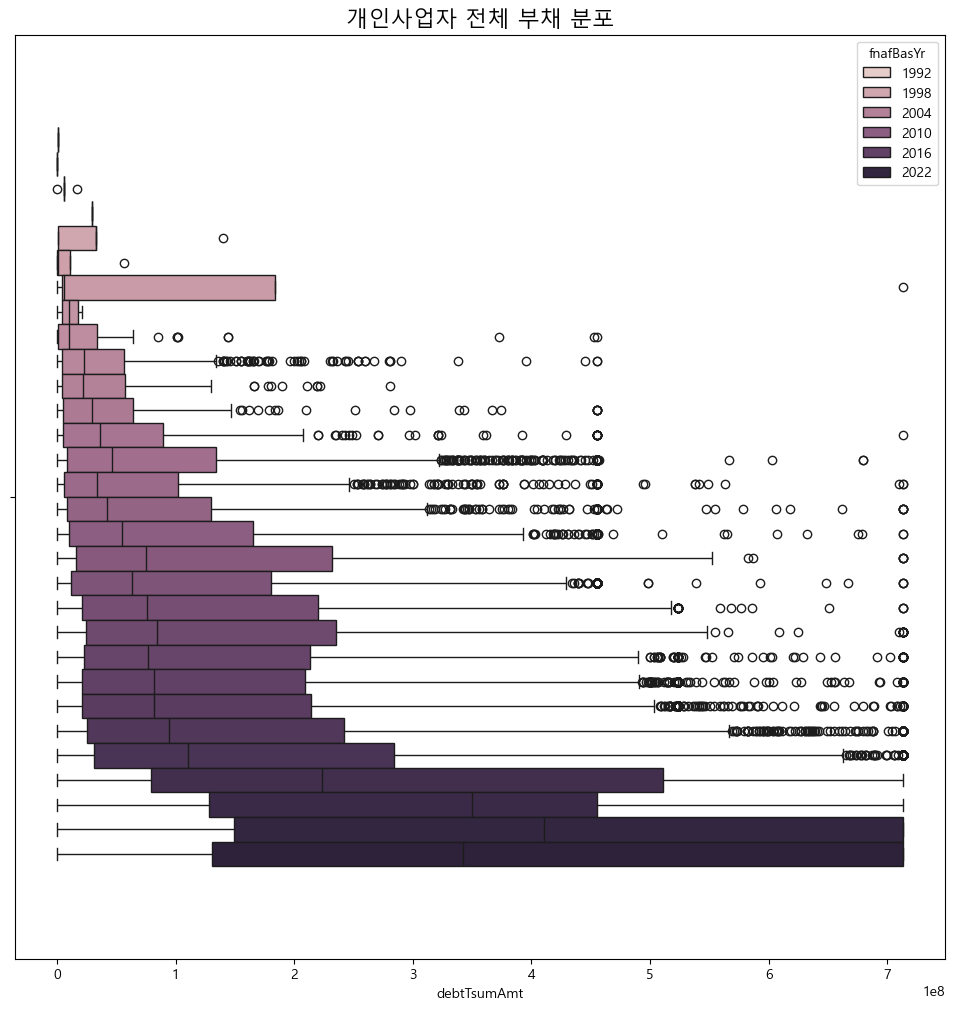

In [ ]:
# 부채규모 점점 늘어남.. 전체적으로 코로나때 부채 바짝 땡겨쓴듯? -> 업종별로 확인??
plt.figure(figsize=(12, 12))  # 그래프 크기 조정
sns.boxplot(data=df, x='debtTsumAmt', hue='fnafBasYr')
plt.title('개인사업자 전체 부채 분포', fontsize=16)
# plt.xticks(rotation=90)
plt.show()

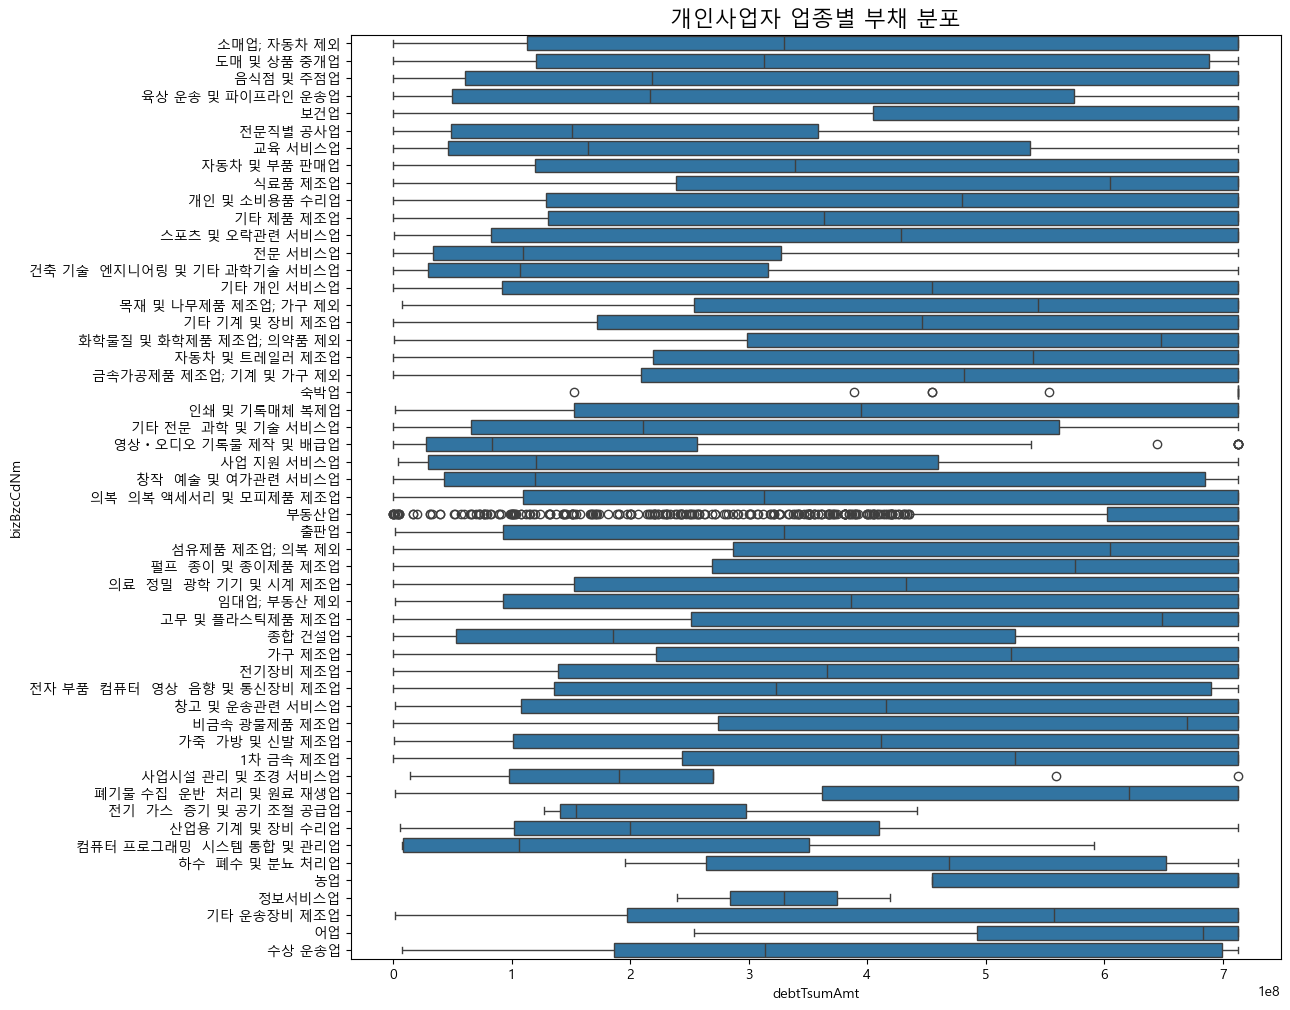

In [144]:
plt.figure(figsize=(12, 12))  # 그래프 크기 조정
sns.boxplot(data=df[df['fnafBasYr']==2022], x='debtTsumAmt', y='bizBzcCdNm')
plt.title('개인사업자 업종별 부채 분포', fontsize=16)
# plt.xticks(rotation=90)
plt.show()

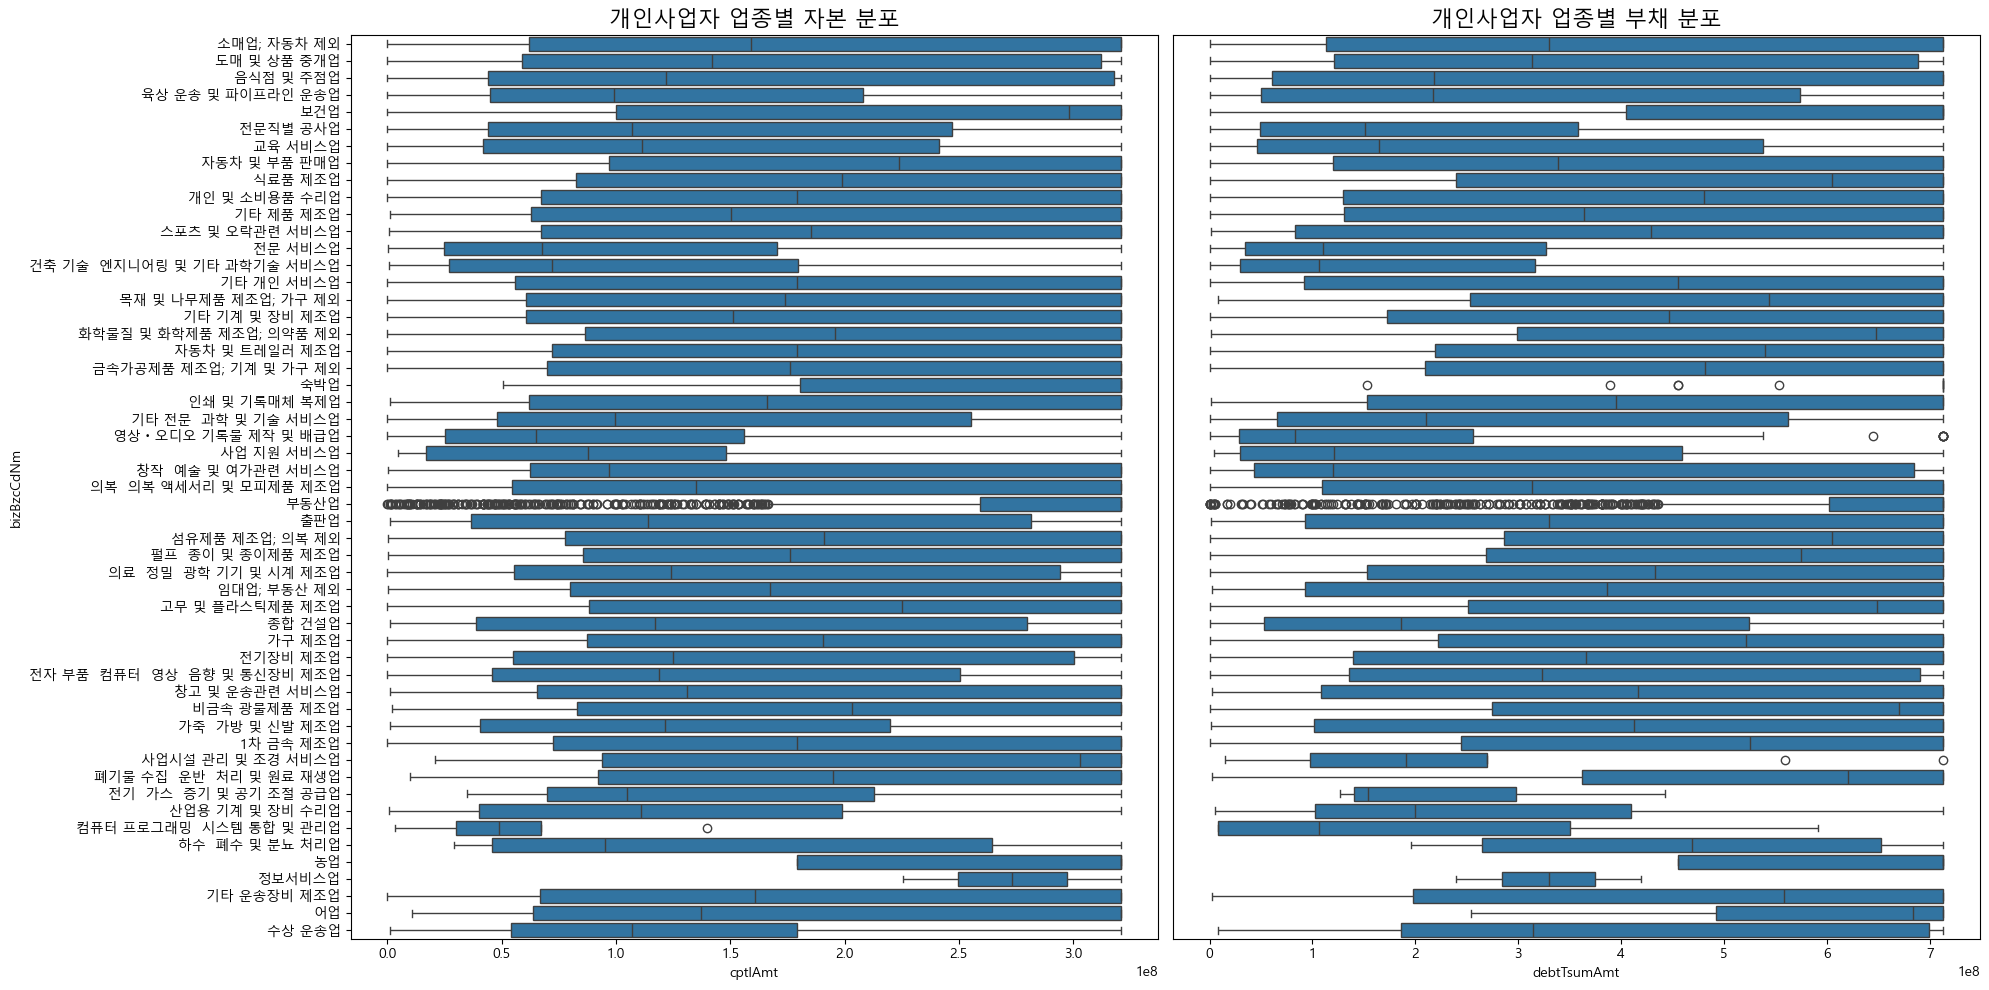

In [ ]:
# 그래프 크기와 배치 설정 (2개의 그래프를 한 줄에 나란히 배치)
plt.figure(figsize=(20, 10))

# 첫 번째 그래프: 자본 분포
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
sns.boxplot(data=df[df['fnafBasYr'] == 2022], x='cptlAmt', y='bizBzcCdNm')
plt.title('개인사업자 업종별 자본 분포', fontsize=16)

# 두 번째 그래프: 부채 분포
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
sns.boxplot(data=df[df['fnafBasYr'] == 2022], x='debtTsumAmt', y='bizBzcCdNm')
plt.title('개인사업자 업종별 부채 분포', fontsize=16)

# 두 번째 그래프에서 y축 레이블 숨기기
plt.gca().get_yaxis().set_visible(False)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

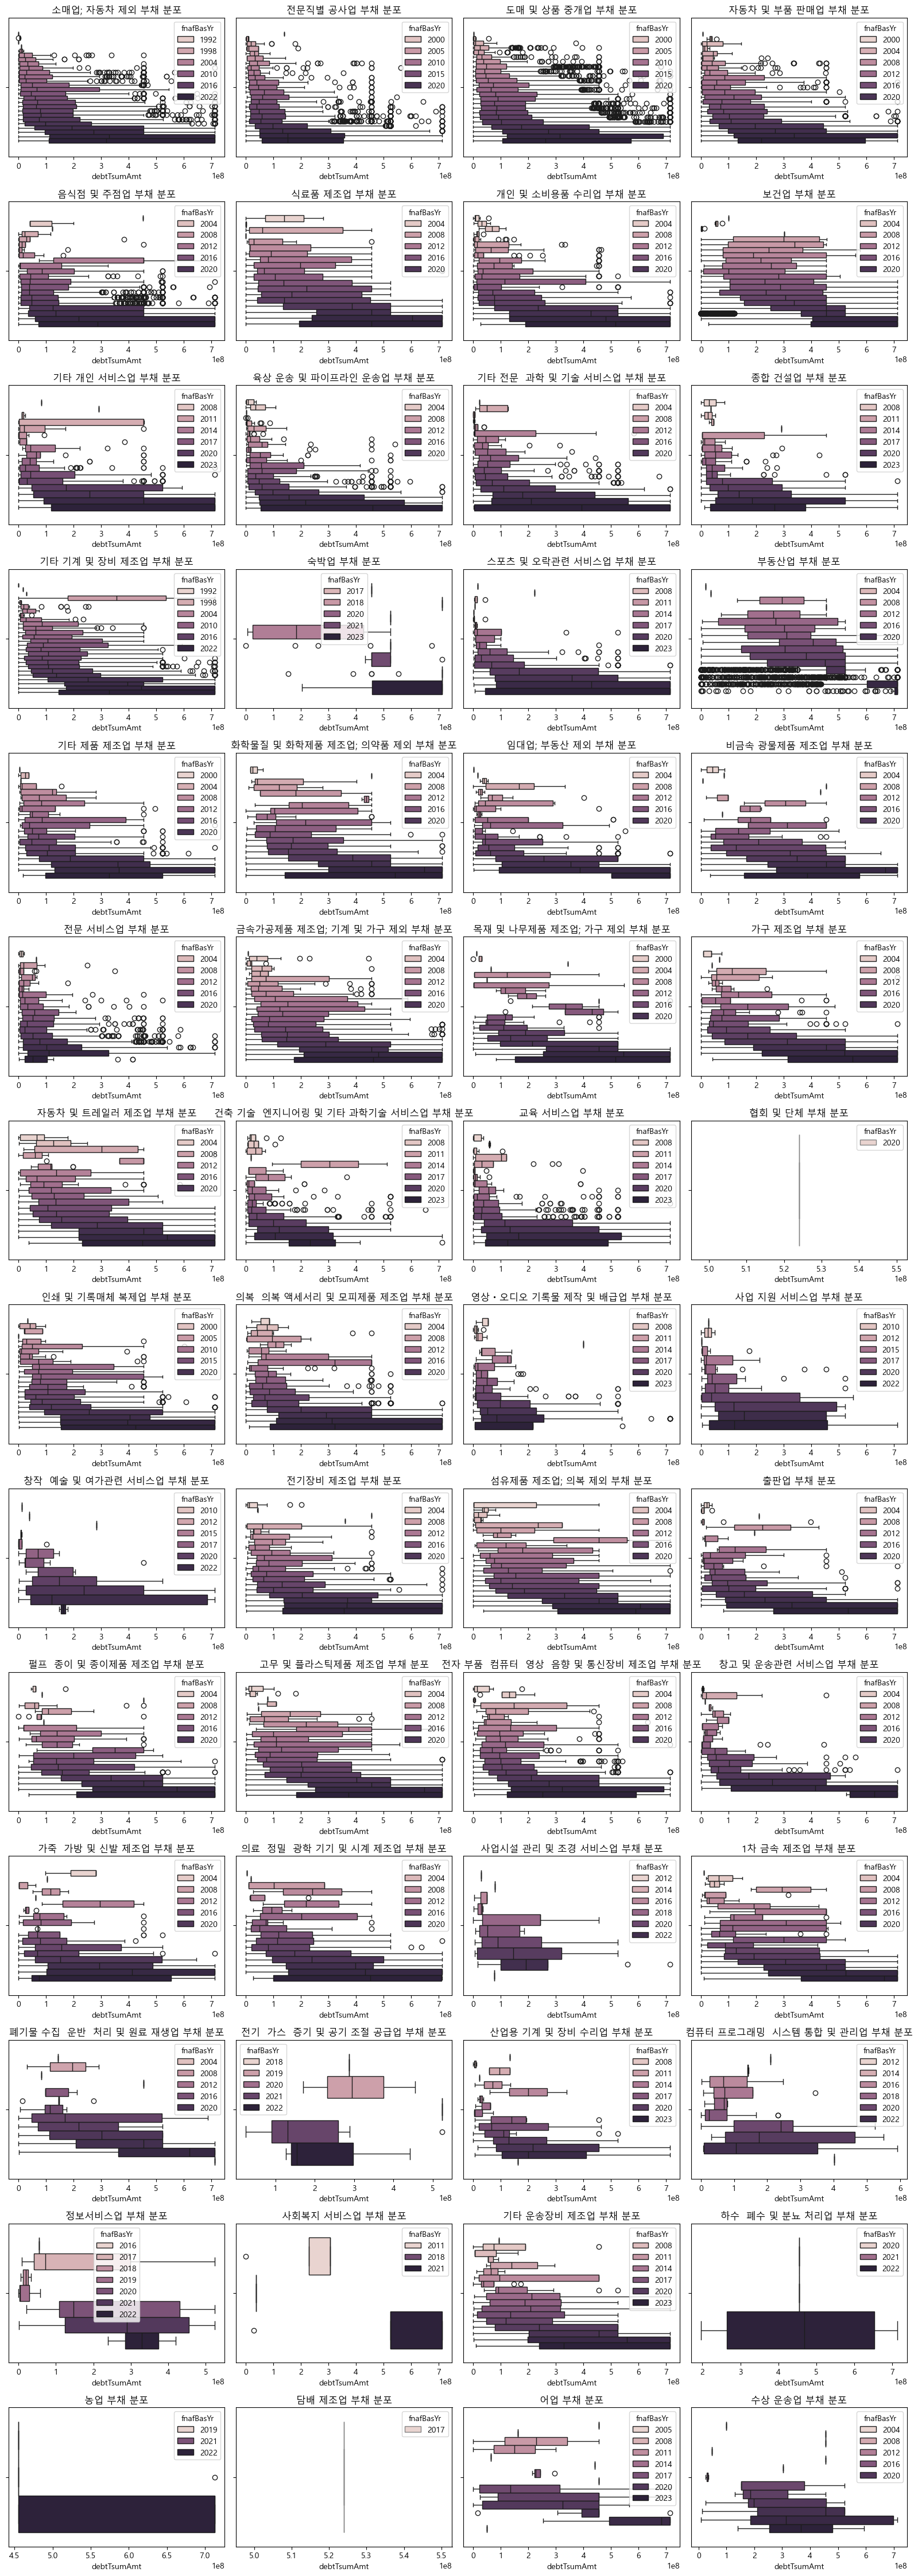

In [171]:
# 고유한 업종 리스트
business_types = df['bizBzcCdNm'].unique()

# 4열로 배치하기 위한 figure 크기 설정
plt.figure(figsize=(16, len(business_types) // 4 * 3 + 3))  # 그래프의 크기 설정

# 업종별로 반복하며 4열로 박스플롯을 그리기
for idx, biz in enumerate(business_types, start=1):
    biz_data = df[df['bizBzcCdNm'] == biz]
    
    # 각 업종을 4열로 배치
    plt.subplot(len(business_types) // 4 + (len(business_types) % 4 != 0), 4, idx)  # 4열로 서브플롯 배치
    sns.boxplot(data=biz_data, x='debtTsumAmt', hue='fnafBasYr')
    plt.title(f'{biz} 부채 분포', fontsize=12)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [172]:
# 부채 증가업종, 부채 감소업종 존재..
# 자본, 부채 증감율 추가
df

,basYm,rprSexNm,rprAggrNm,estbYr,bizAreaNm,bizBzcCd,bizBzcCdNm,empeCntNm,fnafBasYr,cptlAmt,...,지역_도,지역_시,지역_구,지역_세부,부채비율,자본비율,자산회전율,영업이익률,순이익률,자산규모
0,202208,남성,60대,2009,강원도 강릉시,47,소매업; 자동차 제외,1명 이상 5명 미만,2021,181000000,...,강원도,강릉시,,,2.895028,0.215220,1.303210,0.088504,0.067518,중자산
1,202208,남성,50대,1996,강원도 강릉시,42,전문직별 공사업,1명 이상 5명 미만,2020,181000000,...,강원도,강릉시,,,0.331492,0.359127,0.998016,0.033797,0.011928,저자산
2,202208,남성,60대,2000,강원도 강릉시,47,소매업; 자동차 제외,5명 이상 10명 미만,2020,181000000,...,강원도,강릉시,,,1.535912,0.356299,2.157480,0.090328,0.078467,저자산
3,202208,남성,60대,2004,강원도 강릉시,46,도매 및 상품 중개업,1명 이상 5명 미만,2021,69000000,...,강원도,강릉시,,,5.043478,0.165468,2.628297,0.074818,0.062956,저자산
4,202208,남성,40대,2005,강원도 강릉시,46,도매 및 상품 중개업,0명,2020,9000000,...,강원도,강릉시,,,11.888889,0.077586,1.543103,-0.134078,-0.134078,저자산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317637,202406,남성,40대,2012,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,92000000,...,충청북도,충주시,앙성면,,1.282609,0.438095,6.485238,0.045525,0.039650,저자산
317638,202406,남성,50대,2018,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,93300000,...,충청북도,충주시,앙성면,,1.420150,0.413198,6.031444,0.057567,0.054776,저자산
317639,202406,남성,40대,2015,충청북도 충주시 앙성면,46,도매 및 상품 중개업,1명 이상 5명 미만,2022,177000000,...,충청북도,충주시,앙성면,,0.039548,0.961957,7.385870,0.000000,0.000000,저자산
317640,202306,남성,60대,2000,충청북도 충주시 앙성면,46,도매 및 상품 중개업,5명 이상 10명 미만,2015,179000000,...,충청북도,충주시,앙성면,,0.005587,0.430288,2.615385,0.071691,0.062500,저자산
